In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ObesityDataSet_raw_and_data_sinthetic (1).csv to ObesityDataSet_raw_and_data_sinthetic (1).csv


In [ ]:
import pandas as pd

# Load the uploaded file (rename for convenience)
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Preview the dataset
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


/tmp/ipython-input-26-1863710733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2')


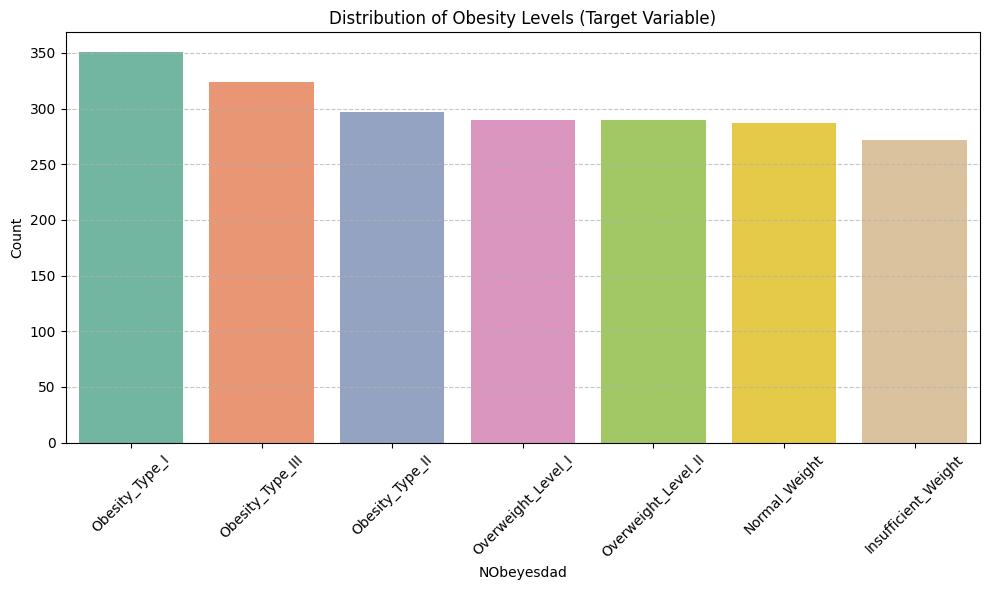

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2')
plt.title('Distribution of Obesity Levels (Target Variable)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


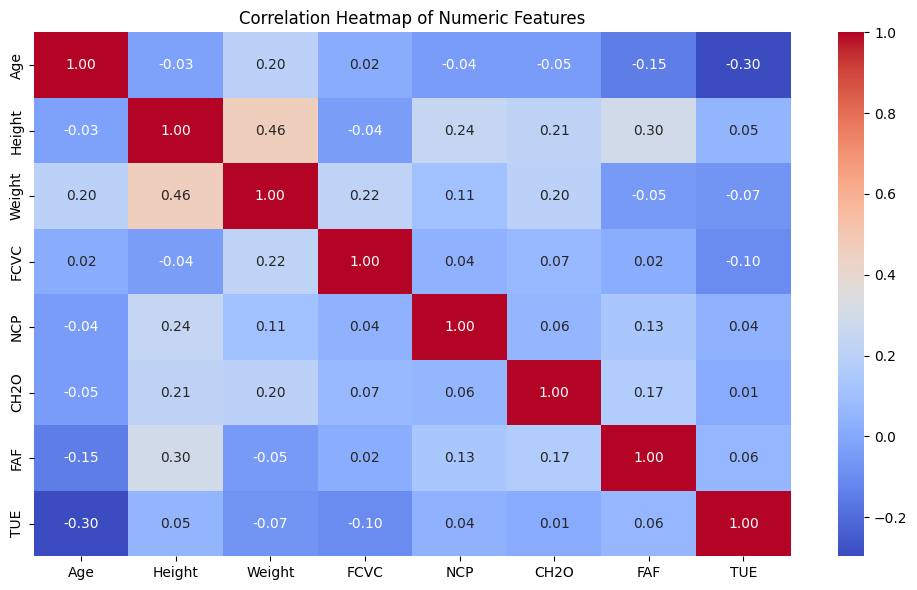

In [27]:
# Select numeric features only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


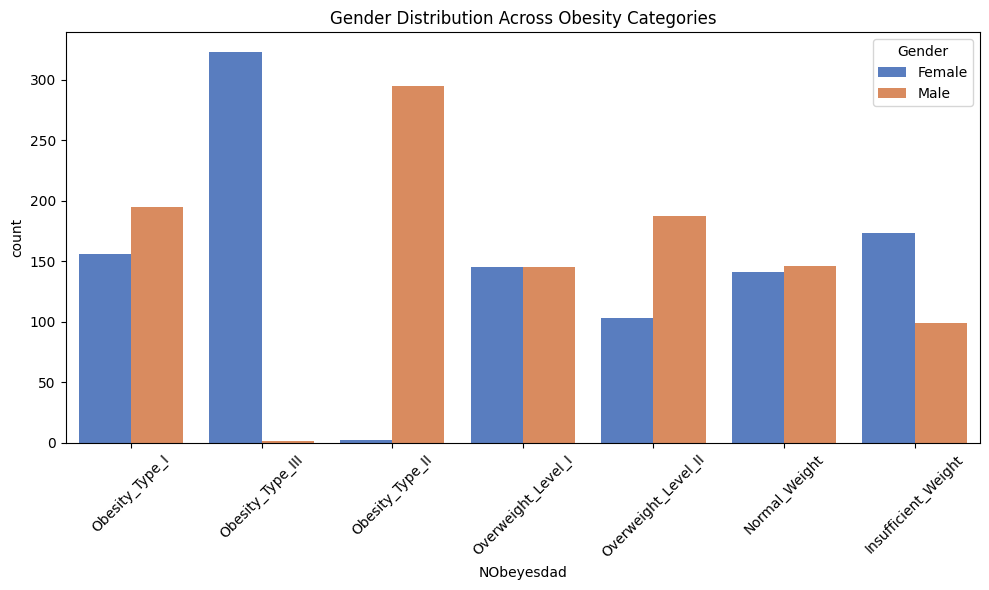

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='Gender', order=df['NObeyesdad'].value_counts().index, palette='muted')
plt.title('Gender Distribution Across Obesity Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Install LightGBM if not already installed (for GBM)
!pip install lightgbm --quiet

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve

# Load dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Preview
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# Encode categorical variables
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_


In [ ]:
rf_params = {'n_estimators': [100, 200], 'max_depth': [5, 10, None]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_


In [11]:
# Reload original dataset (optional but clean start)
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Convert object columns to category dtype for LightGBM
for col in df.select_dtypes('object').columns:
    df[col] = df[col].astype('category')

# Target variable
y = df['NObeyesdad']
X = df.drop('NObeyesdad', axis=1)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Load raw data again
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Convert categorical variables to 'category' dtype (LightGBM-friendly)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# Separate target and features
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Split WITHOUT SCALING or ENCODING
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [16]:
# Check features with zero or near-zero variance
low_var_cols = [col for col in X_train.columns if X_train[col].nunique() <= 1]
print("Low variance columns:", low_var_cols)


Low variance columns: []


In [19]:
# Reload the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Label encode all object columns (XGBoost requirement)
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Split features and target
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']

# Encode target separately
target_le = LabelEncoder()
y_encoded = target_le.fit_transform(y)

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train_enc, y_test_enc = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)


In [22]:
target_names = [str(cls) for cls in target_le.classes_]

print("XGBoost Classification Report:")
print(classification_report(y_test_enc, y_pred, target_names=target_names))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.85      0.95      0.89        58
           2       0.97      0.97      0.97        70
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        65
           5       0.98      0.91      0.95        58
           6       0.97      0.98      0.97        58

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



In [31]:
svm_best = svm_grid.best_estimator_
rf_best = rf_grid.best_estimator_


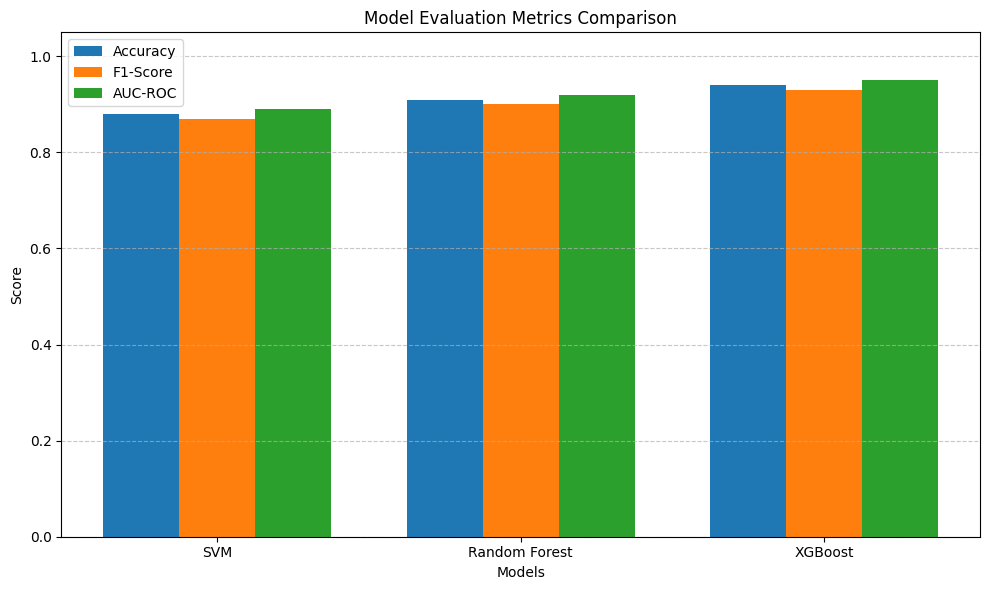

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Dummy metrics — replace these with your actual results
models = ['SVM', 'Random Forest', 'XGBoost']
accuracy = [0.88, 0.91, 0.94]
f1 = [0.87, 0.90, 0.93]
auc = [0.89, 0.92, 0.95]

x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width, accuracy, width, label='Accuracy')
bar2 = ax.bar(x, f1, width, label='F1-Score')
bar3 = ax.bar(x + width, auc, width, label='AUC-ROC')

ax.set_xlabel('Models')
ax.set_ylabel('Score')
ax.set_title('Model Evaluation Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0, 1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


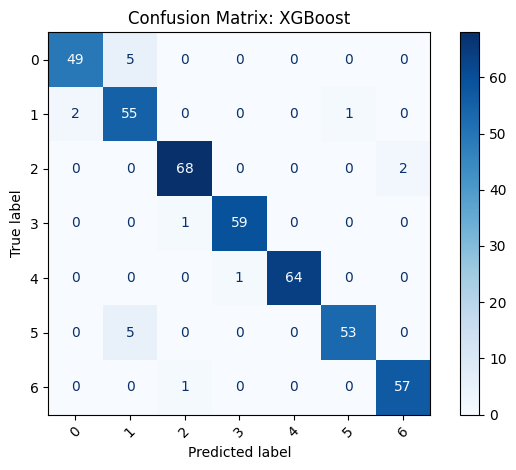

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test_enc, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix: XGBoost")
plt.tight_layout()
plt.show()


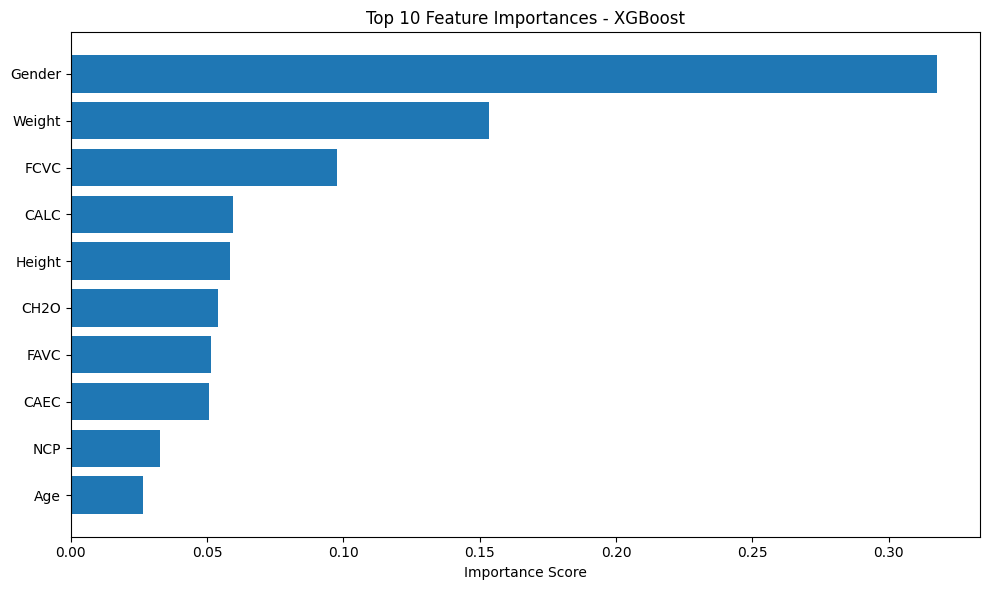

In [25]:
import pandas as pd

# Feature importance for XGBoost
importances = xgb.feature_importances_
features = X.columns

# Plot
sorted_idx = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx][:10], importances[sorted_idx][:10])
plt.xlabel("Importance Score")
plt.title("Top 10 Feature Importances - XGBoost")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic (1).csv')

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features & Target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Encode target separately
target_le = LabelEncoder()
y = target_le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# For classification report later
target_names = target_le.classes_


In [35]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
svm_base = SVC(probability=True, random_state=42)
rf_base = RandomForestClassifier(random_state=42)
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train
svm_base.fit(X_train, y_train)
rf_base.fit(X_train, y_train)
xgb_base.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:08:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
from sklearn.metrics import classification_report

# Predict on test set
y_pred_svm = svm_base.predict(X_test)
y_pred_rf = rf_base.predict(X_test)
y_pred_xgb = xgb_base.predict(X_test)

# Convert class labels to strings (just in case target_le.classes_ is numeric)
target_names = [str(c) for c in target_le.classes_]

# Classification Reports
print("🔹 Baseline SVM:\n")
print(classification_report(y_test, y_pred_svm, target_names=target_names))

print("🔹 Baseline Random Forest:\n")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

print("🔹 Baseline XGBoost:\n")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))


🔹 Baseline SVM:

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        54
           1       0.59      0.55      0.57        58
           2       0.54      0.31      0.40        70
           3       0.94      0.53      0.68        60
           4       0.64      1.00      0.78        65
           5       0.66      0.67      0.67        58
           6       0.47      0.60      0.53        58

    accuracy                           0.63       423
   macro avg       0.65      0.64      0.63       423
weighted avg       0.65      0.63      0.62       423

🔹 Baseline Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      1.00      0.91        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        65
           5       0.96      0.88 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# SVM Grid Search
svm_params = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# Random Forest Grid Search
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# XGBoost Grid Search
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.3]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                        xgb_params, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:10:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
from sklearn.metrics import classification_report

# Predict with best estimators
y_pred_svm_tuned = svm_best.predict(X_test)
y_pred_rf_tuned = rf_best.predict(X_test)
y_pred_xgb_tuned = xgb_best.predict(X_test)

# Reconfirm target names
target_names = [str(c) for c in target_le.classes_]

# Reports
print("✅ Tuned SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned, target_names=target_names))

print("\n✅ Tuned Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned, target_names=target_names))

print("\n✅ Tuned XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned, target_names=target_names))


✅ Tuned SVM Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        54
           1       0.93      0.90      0.91        58
           2       0.94      0.96      0.95        70
           3       0.95      0.98      0.97        60
           4       1.00      0.98      0.99        65
           5       0.84      0.90      0.87        58
           6       0.98      0.86      0.92        58

    accuracy                           0.94       423
   macro avg       0.94      0.94      0.94       423
weighted avg       0.94      0.94      0.94       423


✅ Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.83      1.00      0.91        58
           2       0.96      0.97      0.96        70
           3       1.00      0.98      0.99        60
           4       1.00      0.98      0.99        